In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
qpm = {
    'Horses':0.8200000000000002,
    'Food':0.5508,
    'Dino.':0.9954000000000001,
    'Mount.':0.34259999999999996,
    'Elep.':0.6287999999999999,
    'Africa':0.7464000000000002,
    'Beach':0.4068,
    'Buses':0.6592,
    'Builds.':0.5330000000000001,
    'Flowers':0.7652,
}

multiquery = {
    'Horses':0.907,
    'Food':0.6747999999999998,
    'Dino.':0.9972,
    'Mount.':0.25660000000000005,
    'Elep.':0.7456000000000002,
    'Africa':0.8608000000000001,
    'Beach':0.39020000000000005,
    'Buses':0.6559999999999999,
    'Builds.':0.5596,
    'Flowers':0.7602,
}

rfra = {
    'Horses':0.8983999999999999,
    'Food':0.7046000000000001,
    'Dino.':0.9965999999999999,
    'Mount.':0.34759999999999996,
    'Elep.':0.7339999999999999,
    'Africa':0.8712000000000002,
    'Beach':0.4292,
    'Buses':0.6442,
    'Builds.':0.5866000000000001,
    'Flowers':0.7718
}

In [3]:
import ast 
def read_single_results(arq):
    with open(arq, 'r') as f:
        retorno = {}
        for line in f:
            a, b = line.split(':')
            retorno[a] = ast.literal_eval(b.strip())
            
        return retorno
    
qpmlist = read_single_results('single_results_qpm.txt')
multiquerylist = read_single_results('single_results_multi.txt')
rfralist = read_single_results('single_results_rfra.txt')

print(len(qpmlist), len(multiquerylist), len(rfralist))

1000 1000 1000


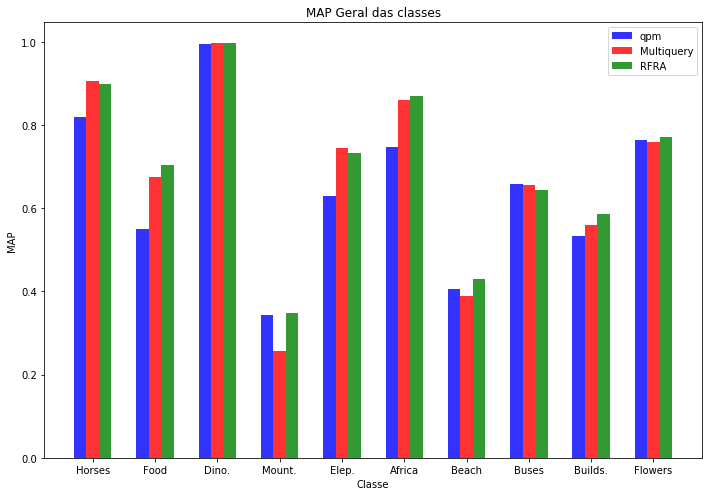

In [4]:
n_groups = 10

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

x_qpm = list(qpm.keys())
y_qpm = list(qpm.values())

x_rfra = list(rfra.keys())
y_rfra = list(rfra.values())

x_multiquery = list(multiquery.keys())
y_multiquery = list(multiquery.values())

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, y_qpm, bar_width,
alpha=opacity,
color='b',
label='qpm')

rects3 = plt.bar(index + bar_width, y_multiquery, bar_width,
alpha=opacity,
color='r',
label='Multiquery')

rects2 = plt.bar(index + 2*bar_width, y_rfra, bar_width,
alpha=opacity,
color='g',
label='RFRA')

plt.xlabel('Classe')
plt.ylabel('MAP')
plt.title('MAP Geral das classes')
plt.xticks(index + bar_width, tuple(x_multiquery))
plt.legend()
 
plt.tight_layout()

plt.show()


In [5]:
chaves = sorted(list(qpmlist.keys()))
dictqpm = {'Hors':[],
'Food':[],
'Dino':[],
'Moun':[],
'Elep':[],
'Afri':[],
'Beac':[],
'Buse':[],
'Buil':[],
'Flow':[]
}
dictmulti = {'Hors':[],
'Food':[],
'Dino':[],
'Moun':[],
'Elep':[],
'Afri':[],
'Beac':[],
'Buse':[],
'Buil':[],
'Flow':[]
}
dictrfra = {'Hors':[],
'Food':[],
'Dino':[],
'Moun':[],
'Elep':[],
'Afri':[],
'Beac':[],
'Buse':[],
'Buil':[],
'Flow':[]
}

for value in qpmlist:
    dictqpm[value[:4]].append(qpmlist[value])
    dictrfra[value[:4]].append(rfralist[value])
    dictmulti[value[:4]].append(multiquerylist[value])



In [6]:
mediaqpm = []
mediamulti = []
mediarfra = []
for chave in dictmulti:
    mediaqpm.append(np.mean(dictqpm[chave], axis=0))
    mediamulti.append(np.mean(dictmulti[chave], axis=0))
    mediarfra.append(np.mean(dictrfra[chave], axis=0))

In [7]:
mediarfra = np.array(mediarfra)
mediamulti = np.array(mediamulti)
mediaqpm = np.array(mediaqpm)
print(mediaqpm[:, 1], '\n', mediamulti[:, 1], '\n', mediarfra[:, 1])
print(mediaqpm[:, 2], '\n', mediamulti[:, 2], '\n', mediarfra[:, 2])

[0.831 0.551 0.994 0.301 0.624 0.766 0.367 0.622 0.494 0.744] 
 [0.888 0.559 1.    0.181 0.647 0.837 0.288 0.528 0.457 0.691] 
 [0.882 0.65  0.997 0.313 0.705 0.866 0.377 0.61  0.529 0.731]
[0.843 0.585 0.998 0.36  0.656 0.781 0.431 0.72  0.563 0.802] 
 [0.946 0.712 1.    0.246 0.78  0.902 0.39  0.69  0.577 0.78 ] 
 [0.936 0.748 1.    0.356 0.768 0.917 0.448 0.681 0.632 0.796]


In [152]:
def autolabel(rects, ax, c):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    lc = c
    for rect in rects:
        height = rect.get_height()
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
            
        if ('%.2f' % height) == "1.00":
            c = "white"
            value = "1.0"
        else:
            c = lc
            value = '%.2f' % height
        
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                value,
                ha='center', va='bottom', color=c)


In [161]:
def autolabel2(rects, ax, c):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    lc = c
    for rect in rects:
        height = rect.get_height()
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.99: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
            
        if ('%.2f' % height) == "1.00":
            c = "white"
            value = "1.0"
        else:
            c = lc
            value = '%.2f' % height
        
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                value,
                ha='center', va='bottom', color=c)

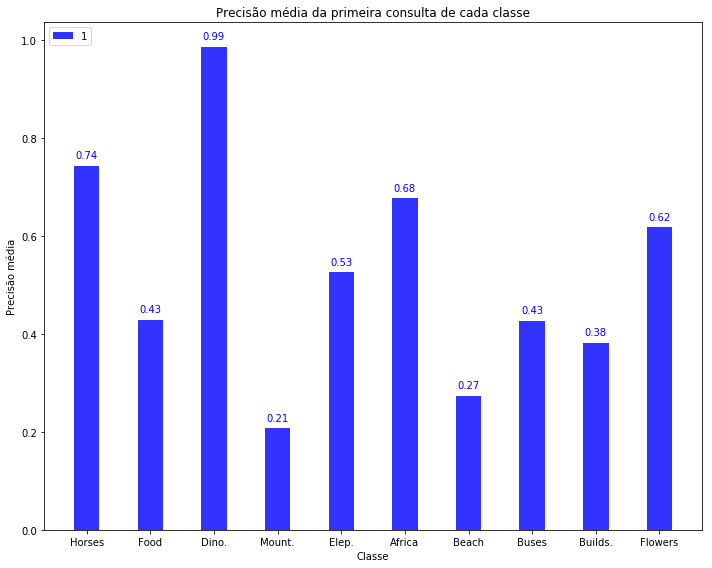

In [167]:
def plot_begin(arraymedias, titulo):
    n_groups = 10
    plt.rcParams["figure.figsize"] = (10,8)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.4
    opacity = 0.8

    rects1 = ax.bar(index, arraymedias[:,0], bar_width,
    alpha=opacity,
    color='b',
    label='1')
    
    autolabel2(rects1, ax, 'b')
    
    plt.xlabel('Classe')
    plt.ylabel('Precisão média')
    plt.title(titulo)
    plt.xticks(index, tuple(x_multiquery))
    plt.legend(loc='upper left')

    plt.tight_layout()
    

    plt.show()
    
plot_begin(mediaqpm, "Precisão média da primeira consulta de cada classe")

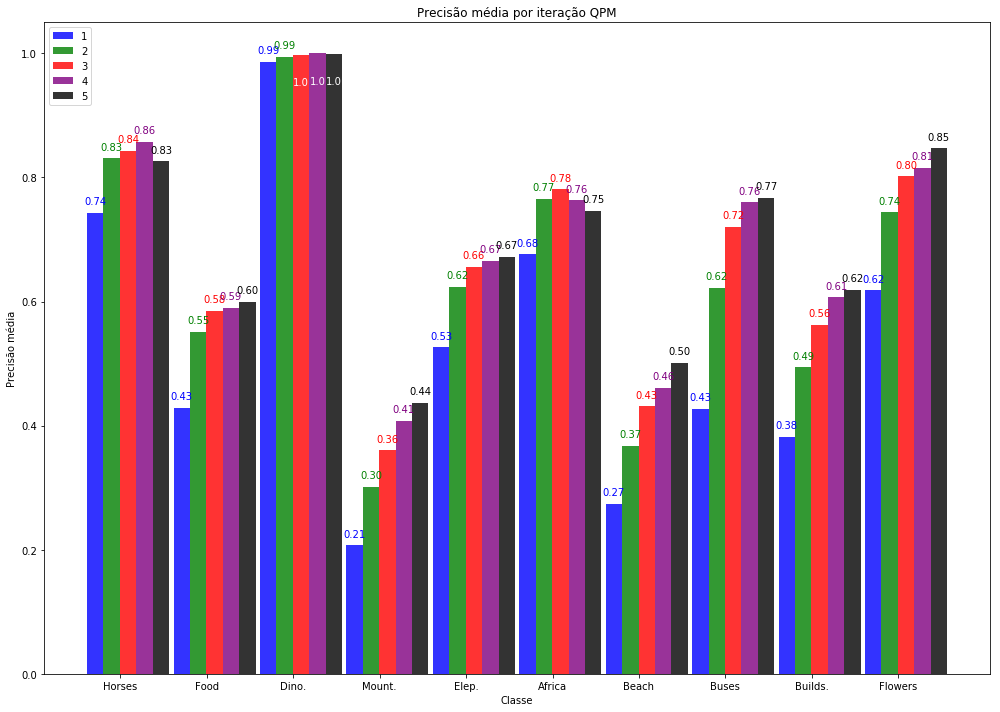

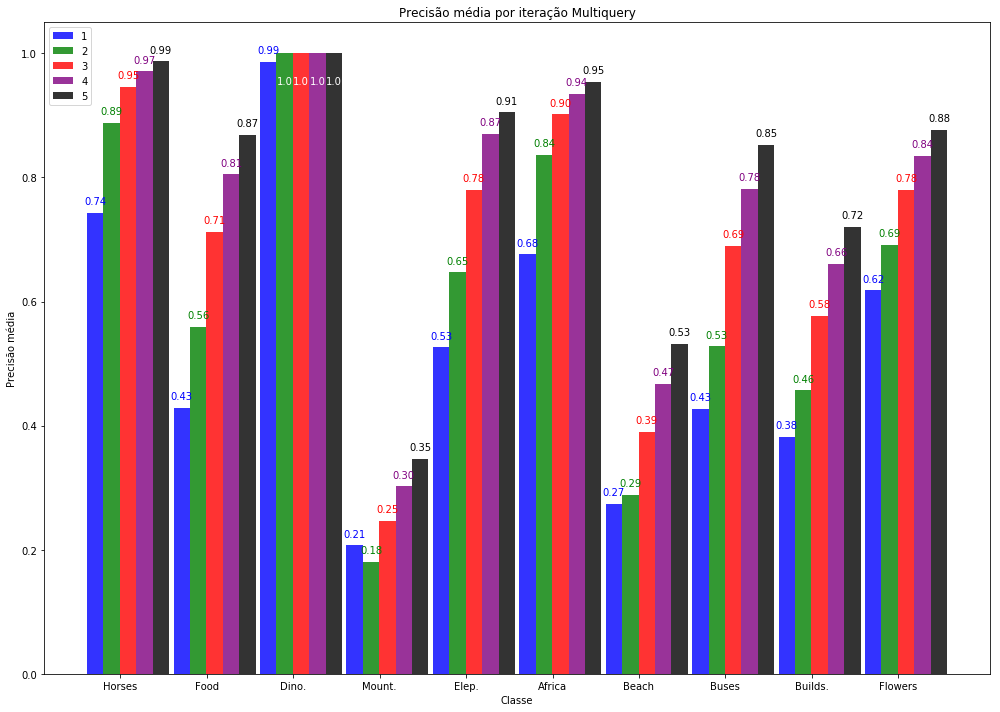

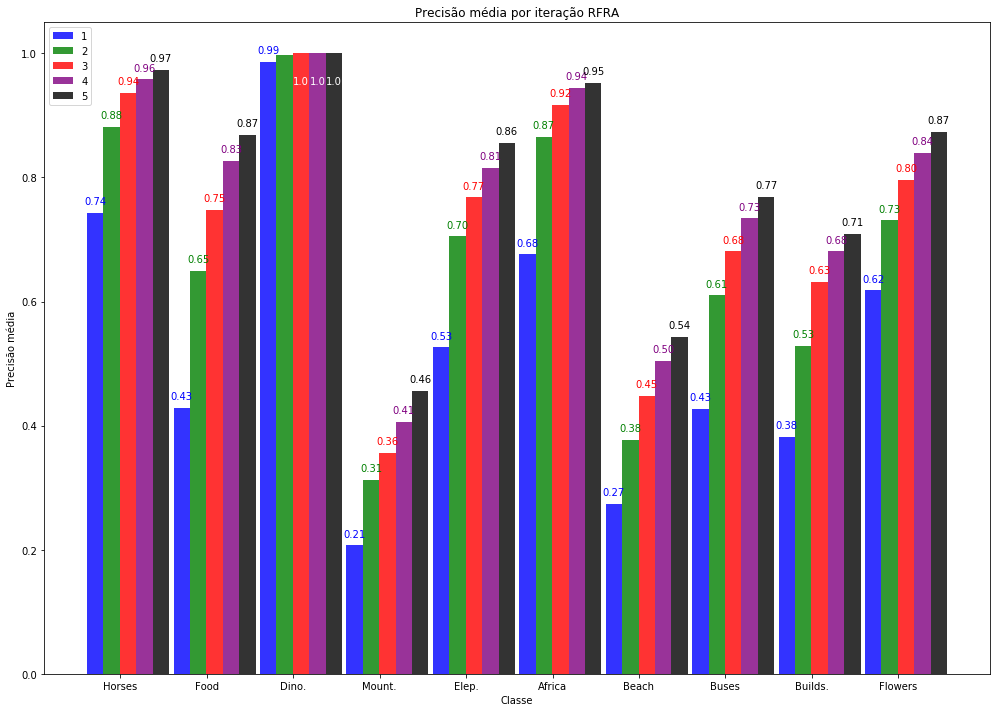

In [153]:


def plot_iterations(arraymedias, titulo):
    n_groups = 10
    plt.rcParams["figure.figsize"] = (14,10)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.19
    opacity = 0.8

    rects1 = ax.bar(index, arraymedias[:,0], bar_width,
    alpha=opacity,
    color='b',
    label='1')

    rects2 = ax.bar(index + bar_width, arraymedias[:,1], bar_width,
    alpha=opacity,
    color='g',
    label='2')

    rects3 = ax.bar(index + 2*bar_width, arraymedias[:,2], bar_width,
    alpha=opacity,
    color='r',
    label='3')

    rects4 = ax.bar(index + 3*bar_width, arraymedias[:,3], bar_width,
    alpha=opacity,
    color='purple',
    label='4')

    rects5 = ax.bar(index + 4*bar_width, arraymedias[:,4], bar_width,
    alpha=opacity,
    color='black',
    label='5')
    
    autolabel(rects1, ax, 'b')
    autolabel(rects2, ax, 'green')
    autolabel(rects3, ax, 'red')
    autolabel(rects4, ax, 'purple')
    autolabel(rects5, ax, 'black')
    
    plt.xlabel('Classe')
    plt.ylabel('Precisão média')
    plt.title(titulo)
    plt.xticks(index + bar_width + 0.1, tuple(x_multiquery))
    plt.legend(loc='upper left')

    plt.tight_layout()
    

    plt.show()
    

    
plot_iterations(mediaqpm, 'Precisão média por iteração QPM')
plot_iterations(mediamulti, 'Precisão média por iteração Multiquery')
plot_iterations(mediarfra, 'Precisão média por iteração RFRA')